In [5]:
import numpy as np
import pyquaternion as pyQ

import geometricmechanics as gm

### Cube Copter

In [6]:
## Ok
masses = np.array([1,1,1,1,1,1,1,1,.5,.5])
n_mass = len(masses)
r_0 = [None]*n_mass

r_0[0] = [1, 1, 0]
r_0[1] = [1, -1, 0]
r_0[2] = [-1, 1, 0]
r_0[3] = [-1, -1, 0]
r_0[4] = [1, 1, -1]
r_0[5] = [1,-1,-1]
r_0[6] = [-1,1,-1]
r_0[7] = [-1, -1, -1]
r_0[8] = [0, -.5, .5]
r_0[9] = [0, .5, .5]

r_0 = np.array(r_0)

In [7]:
body_lines = (
    ## top
    (0, 1),
    (0, 2),
    (1, 3),
    (3, 2),

    ## bottom
    (4, 5),
    (4, 6),
    (5, 7),
    (7, 6),
    
    ## vertical
    (0, 4),
    (1, 5),
    (3, 7),
    (2, 6),
    
    ## propeller
    (8, 9)
    )

In [8]:
q_0 = pyQ.Quaternion(axis = [1,0,0], radians = 0)
p_0 = [0,0,1]

tmax = 10
num_times = 400
time = np.linspace(0,tmax,num_times)
r = [0]*len(masses)

In [9]:
for i in range(0,len(masses)):
    r[i] = lambda t, i=i: r_0[i, :]

tmax_r1 = tmax/20
ang_max = np.pi/2
freq = 2*np.pi/tmax
for i in range(len(masses)-2):
    def ri(t, j=i):
        q = pyQ.Quaternion(axis = [0,0,1], radians = freq*t/tmax_r1)
        return q.rotate(r_0[j])
    r[i] = ri
    
for i in (8,9):
    def ri(t, j=i):
        q = pyQ.Quaternion(axis = [0,0,1], radians = -freq*t/tmax_r1)
        return q.rotate(r_0[j])
    r[i] = ri

In [15]:
cube = gm.deformableBody(r_0, masses, p_0, r, num_times, body_lines)
cube.translation_CM()
q = gm.Physics.solve_eq(cube.p_0, time, r, masses)
pos = cube.set_positions(q, cube.rot, tmax)

In [7]:
g = gm.Graphics()

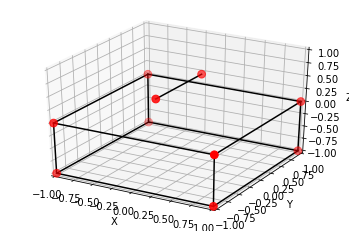

In [16]:
g.create_plot(cube.positions, body_lines, time, name = 'CubeCopter', save = False)

### Falling Cat

In [29]:
masses = np.array([3, 2, 1, 1, 0.2, 2, 1, 1, 1.3])*50

r_0 = [None]*len(masses)

r_0[0] = [0, 0, 0] #centro do corpo

r_0[1] = [0, -1, 0] #parte de trás 
r_0[2] = [0.5,  -1, 1] #pata tras 1 
r_0[3] = [-0.5, -1, 1] # pata trás 2
r_0[4] = [0, -1.5, -0.5] #cauda
 
r_0[5] = [0,  1, 0]  #parte da frente
r_0[6] = [0.5, 1, 1] #pata frente 1 
r_0[7] = [-0.5, 1,1] #pata frente 2
r_0[8] = [0, 1.2, -0.2] #cabeça

r_0 = np.array(r_0)

#Lines between each part of the body
#Only used in animation
body_lines = [
    (0, 1),
    (1, 2),
    (1, 3),
    (1, 4),

    (0, 5),
    (5, 6),
    (5, 7),
    (5, 8),
]

## Identity Rotation
q_0 = pyQ.Quaternion(axis = [1,0,0], radians = 0)
p_0 = [0,0,0]

tmax = 10
num_times = 400
time = np.linspace(0,tmax,num_times)
r = [0 for i in range(0, len(masses))]

## wth is going on here?
for i in range(0,len(masses)):
    r[i] = lambda t, i=i: r_0[i, :]

    
tmax_r1 = tmax/20
ang_max = -np.pi/6
freq = 2*np.pi/(tmax - tmax_r1)
for i in (1,2,3,4):
    def ri(t, j=i):
        if t < tmax_r1:
            t_q = pyQ.Quaternion(axis = [1,0,0], radians = t*ang_max/tmax_r1)
            return t_q.rotate(r_0[j, :])
        else:
            t_q = pyQ.Quaternion(axis = [1,0,0], radians = ang_max)
            rx = t_q.rotate(r_0[j, :])
            axis = t_q.rotate(r_0[1, :]) - t_q.rotate(r_0[0, :])
            t_q2 = pyQ.Quaternion(axis = axis, radians = freq*(t-tmax_r1))
            
            return t_q2.rotate(rx)
    r[i] = ri

for i in (5,6,7,8):
    def ri(t, j=i):
        if t < tmax_r1:
            t_q = pyQ.Quaternion(axis = [1,0,0], radians = -t*ang_max/tmax_r1)
            return t_q.rotate(r_0[j, :])
        else:
            t_q = pyQ.Quaternion(axis = [1,0,0], radians = -ang_max)
            rx = t_q.rotate(r_0[j, :])
            axis = t_q.rotate(r_0[1, :]) - t_q.rotate(r_0[0, :])
            t_q2 = pyQ.Quaternion(axis = axis, radians = -freq*(t-tmax_r1))
            
            return t_q2.rotate(rx)
    r[i] = ri    

In [30]:
cat = gm.deformableBody(r_0, masses, p_0, r, num_times, body_lines)
cat.translation_CM()
q = gm.Physics.solve_eq(cat.p_0, time, r, masses)
pos = cat.set_positions(q, cat.rot, tmax)

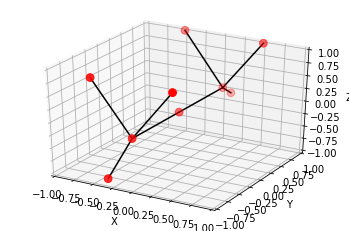

In [32]:
g.create_plot(cat.positions, body_lines, time, name = 'Cat', save = True)